### Initial browse through the data and library imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
loan_data = pd.read_csv('application_train.csv')

In [3]:
loan_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
loan_data.shape

(307511, 122)

### Initial feature selection
This section is concerned with reducing the dimensionality of the data

We observe that there are 122 columns in this dataframe. We will take a look at the descriptions for each feature and decide whether or not some are needed, are redundant or can be merged into a single feature.

A few of the features that will be removed and the explanation why are these: <br><br>

- AMT_GOODS_PRICE: Seems redundant as we already have the total amount that's been loaned.
- DAYS_ID_PUBLISH; DAYS_REGISTRATION: Days since the applicant changed registration with which he applied for the loan cannot be too influential. A plot will try to explain this:

<AxesSubplot:xlabel='DAYS_REGISTRATION', ylabel='Count'>

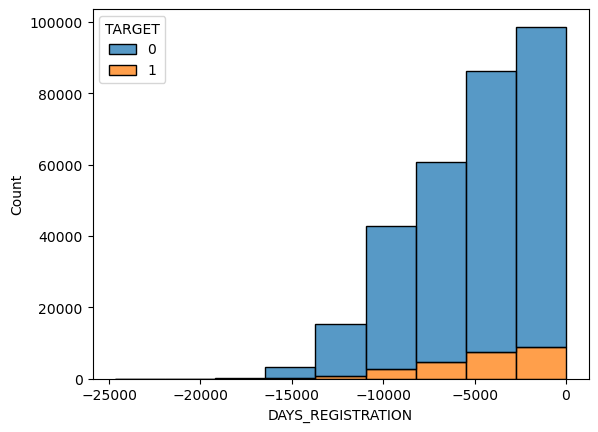

In [5]:
sns.histplot(bins = 9, x="DAYS_REGISTRATION", hue="TARGET", data=loan_data, stat="count", multiple="stack")

<AxesSubplot:xlabel='DAYS_ID_PUBLISH', ylabel='Count'>

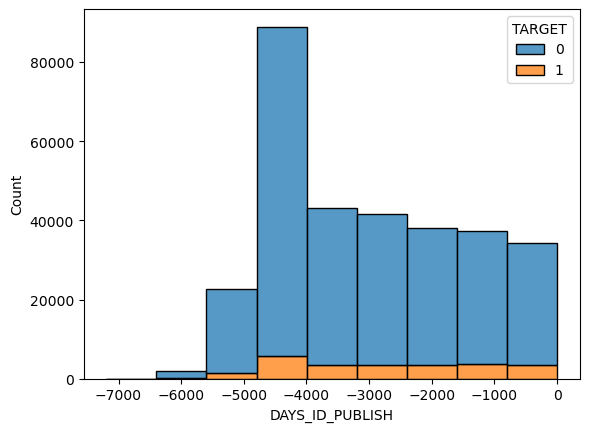

In [6]:
sns.histplot(bins = 9, x="DAYS_ID_PUBLISH", hue="TARGET", data=loan_data, stat="count", multiple="stack")


- OWN_CAR_AGE: Will likely move in opposite direction as client income. May cause collinearity.
- CNT_FAM_MEMBERS: Too much correlation with CNT_CHILDREN.
- FLAG_MOBIL; FLAG_EMP_PHONE; FLAG_WORK_PHONE; FLAG_CONT_MOBILE; FLAG_PHONE; FLAG_EMAIL: Could be aggregated into a single feature 'Client_gave_contact_info', but will be pointless since the bank would never give a loan otherwise.
- WEEKDAY_APPR_PROCESS_START: Whether a client asked for a loan on a Monday or Tuesday cannot be the reason why he eventually defaulted. Any statistical significance while analyzing it will almost surely be due to luck and the feature will therefore be discarded.
- HOUR_APPR_PROCESS_START: Same as weekday
- REG_REGION_NOT_LIVE_REGION; REG_REGION_NOT_WORK_REGION; LIVE_REGION_NOT_WORK_REGION; REG_CITY_NOT_LIVE_CITY; REG_CITY_NOT_WORK_CITY; LIVE_CITY_NOT_WORK_CITY: If a client's contact address is different than his work address would make no difference in the odds of defaulting.
<br><br>We get into a chunk of features relating to the building in which the client lives. Initially we may want to take a look at only the average values (not the median or mode), which is scaled. Therefore we will drop the median and mode columns of:<br><br>
- APARTMENTS_
- BASEMENTAREA_
- YEARS_BEGINEXPLUATATION_
- YEARS_BUILD_
- COMMON_AREA_
- ELEVATORS_
- ENTRANCES_
- FLOORSMAX_
- FLOORSMIN_
- LANDAREA_
- LIVINGAPARTMENTS_
- LIVINGAREA_
- NONLIVINGAPARTMENTS_
- NONLIVINGAREA_
<br><br>
However when looking at the remaining features, in this case the average of the ones we just dropped, we note that there are just too many missing rows, well above 50% of the total observations. We will need to drop the features as we won't be able to deal with the missing data and make relevant models later on because of this.

<br><br>
For days since last phone change, we repeat the process of plotting we did earlier for days since changing ID.

<AxesSubplot:xlabel='DAYS_LAST_PHONE_CHANGE', ylabel='Count'>

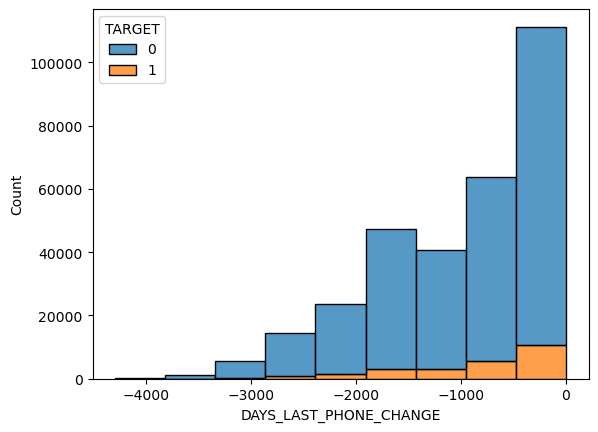

In [7]:
sns.histplot(bins = 9, x="DAYS_LAST_PHONE_CHANGE", hue="TARGET", data=loan_data, stat="count", multiple="stack")

We get a very similar result as with changing an ID. Any statistical significance between the two variables will likely be due to chance. Therefore we also drop the feature.
<br><br>
The next chunk of features we will remove are about flags regarding providing certain documents to the bank. As we do not know what these documents are the safer thing will be to delete them to try and avoid building a model which we won't be able to interpret with features we cannot understand.
<br>
Finally, we will be removing the final features, which are about number of enquires to the credit bureau in the last year. These enquiries are so rare that they are not often seen in neither defaulting nor non defaulting clients. The features will provide little to no predictive power.

In [8]:
columns_to_drop = """AMT_GOODS_PRICE
DAYS_REGISTRATION
DAYS_ID_PUBLISH
OWN_CAR_AGE
CNT_FAM_MEMBERS
NAME_TYPE_SUITE
FLAG_MOBIL
FLAG_EMP_PHONE
FLAG_WORK_PHONE
FLAG_CONT_MOBILE
FLAG_PHONE
FLAG_EMAIL
WEEKDAY_APPR_PROCESS_START
HOUR_APPR_PROCESS_START
REG_REGION_NOT_LIVE_REGION
REG_REGION_NOT_WORK_REGION
LIVE_REGION_NOT_WORK_REGION
REG_CITY_NOT_LIVE_CITY
REG_CITY_NOT_WORK_CITY
LIVE_CITY_NOT_WORK_CITY
APARTMENTS_AVG
BASEMENTAREA_AVG
YEARS_BEGINEXPLUATATION_AVG
YEARS_BUILD_AVG
COMMONAREA_AVG
ELEVATORS_AVG
ENTRANCES_AVG
FLOORSMAX_AVG
FLOORSMIN_AVG
LANDAREA_AVG
LIVINGAPARTMENTS_AVG
LIVINGAREA_AVG
NONLIVINGAPARTMENTS_AVG
NONLIVINGAREA_AVG
APARTMENTS_MODE
BASEMENTAREA_MODE
YEARS_BEGINEXPLUATATION_MODE
YEARS_BUILD_MODE
COMMONAREA_MODE
ELEVATORS_MODE
ENTRANCES_MODE
FLOORSMAX_MODE
FLOORSMIN_MODE
LANDAREA_MODE
LIVINGAPARTMENTS_MODE
LIVINGAREA_MODE
NONLIVINGAPARTMENTS_MODE
NONLIVINGAREA_MODE
APARTMENTS_MEDI
BASEMENTAREA_MEDI
YEARS_BEGINEXPLUATATION_MEDI
YEARS_BUILD_MEDI
COMMONAREA_MEDI
ELEVATORS_MEDI
ENTRANCES_MEDI
FLOORSMAX_MEDI
FLOORSMIN_MEDI
LANDAREA_MEDI
LIVINGAPARTMENTS_MEDI
LIVINGAREA_MEDI
NONLIVINGAPARTMENTS_MEDI
NONLIVINGAREA_MEDI
FONDKAPREMONT_MODE
HOUSETYPE_MODE
TOTALAREA_MODE
WALLSMATERIAL_MODE
EMERGENCYSTATE_MODE
DAYS_LAST_PHONE_CHANGE
FLAG_DOCUMENT_2
FLAG_DOCUMENT_3
FLAG_DOCUMENT_4
FLAG_DOCUMENT_5
FLAG_DOCUMENT_6
FLAG_DOCUMENT_7
FLAG_DOCUMENT_8
FLAG_DOCUMENT_9
FLAG_DOCUMENT_10
FLAG_DOCUMENT_11
FLAG_DOCUMENT_12
FLAG_DOCUMENT_13
FLAG_DOCUMENT_14
FLAG_DOCUMENT_15
FLAG_DOCUMENT_16
FLAG_DOCUMENT_17
FLAG_DOCUMENT_18
FLAG_DOCUMENT_19
FLAG_DOCUMENT_20
FLAG_DOCUMENT_21
AMT_REQ_CREDIT_BUREAU_HOUR
AMT_REQ_CREDIT_BUREAU_DAY
AMT_REQ_CREDIT_BUREAU_WEEK
AMT_REQ_CREDIT_BUREAU_MON
AMT_REQ_CREDIT_BUREAU_QRT
AMT_REQ_CREDIT_BUREAU_YEAR"""

In [9]:
columns_to_drop = [columns_to_drop.split("\n")]

Therefore, the reduced data will be as follows:

In [10]:
df = loan_data.drop(columns = columns_to_drop[0])
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2,2,Business Entity Type 3,0.083037,0.262949,0.139376,2.0,2.0,2.0,2.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,1,1,School,0.311267,0.622246,NaN,1.0,0.0,1.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,2,2,Government,NaN,0.555912,0.729567,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,2,2,Business Entity Type 3,NaN,0.650442,NaN,2.0,0.0,2.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,2,2,Religion,NaN,0.322738,NaN,0.0,0.0,0.0,0.0


Finally, we will drop the table id, in this case SK_ID_CURR, as it only serves to identify each instance and shouldn't influence the model. And we will also extract the response variable, in this case TARGET.

In [11]:
y = df.TARGET.copy()
X = df.drop(columns= ['SK_ID_CURR', 'TARGET'])

We know have a far more manageable data with 26 features to predict whether or not a client will default on a loan.

### Data transformation
In this section the focus will be on the following:
- Dealing with missing observations
- Encoding categorical features (will use One Hot Encoder for all of them)
- Scale the numerical features that haven't been scaled yet (will use Standard Scaler)

In [12]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 26 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   NAME_CONTRACT_TYPE           307511 non-null  object 
 1   CODE_GENDER                  307511 non-null  object 
 2   FLAG_OWN_CAR                 307511 non-null  object 
 3   FLAG_OWN_REALTY              307511 non-null  object 
 4   CNT_CHILDREN                 307511 non-null  int64  
 5   AMT_INCOME_TOTAL             307511 non-null  float64
 6   AMT_CREDIT                   307511 non-null  float64
 7   AMT_ANNUITY                  307499 non-null  float64
 8   NAME_INCOME_TYPE             307511 non-null  object 
 9   NAME_EDUCATION_TYPE          307511 non-null  object 
 10  NAME_FAMILY_STATUS           307511 non-null  object 
 11  NAME_HOUSING_TYPE            307511 non-null  object 
 12  REGION_POPULATION_RELATIVE   307511 non-null  float64
 13 

**Missing observations**
<br><br>
Columns with missing observations:
- AMT_ANNUITY
- OCCUPATION_TYPE
- EXT_SOURCE_1
- EXT_SOURCE_2
- EXT_SOURCE_3
- OBS_30_CNT_SOCIAL_CIRCLE 
- DEF_30_CNT_SOCIAL_CIRCLE     
- OBS_60_CNT_SOCIAL_CIRCLE      
- DEF_60_CNT_SOCIAL_CIRCLE

For AMT_ANNUITY, as it is a numerical feature and is only missing 12 rows of data (out of over 300 thousand), it can safely fall in a category of features in which we can input the mean to replace the null value.

For OCCUPATION_TYPE, as it is a categorical value and there are a lot of missing values (around 100 thousand), we cannot drop the rows, and perhaps the safer solution would be to replace the null values with a new category which we will define as 'Undisclosed'.

For EXT_SOURCE_ 1 through 3, as it is something the bank likely inputed, we cannot discard. We observe that the data is scaled and goes from 0 to 1 with mean and median close to 0.5. Because of this and because we do not know the nature of this variable, only that we cannot ignore it, we can go the safe way and input the missing data as mean of the standardized observations.

Finally, regarding observations of social circle defaulting, numerical features with very few missing data, we will also input the mean.

**Establishing the pipelines for data imputation, scaling and encoding**

From our 26 features, we have a total of 16 numerical columns. Eight of the latter were discussed in the previous section as needing to input data for missing observations. 

5 of these 8 happen to not be scaled. We therefore will need to create a few pipelines to deal with the distinct categories of features we have run into:

- Pipeline_1: Will deal with numbers that need data input and scaling (AMT_ANNUITY and the ones regarding close social circle defaulting).
- Pipeline_2: Will deal with numbers that only need data input (EXT_SOURCE_1 through 3).
- Pipeline_3: Will deal with numbers than only need scaling (CNT_CHILDREN; AMT_INCOME_TOTAL; AMT_CREDIT; DAYS_BIRTH; DAYS_EMPLOYED; REGION_RATING_CLIENT; REGION_RATING_CLIENT_W_CITY).

Now, for the remaining 10 features, the categorical ones, we need to split them only into two different categories as follows:

- Pipeline_4: Will deal with the one that needs input for missing data and needs to be encoded (OCCUPATION_TYPE)
- Pipeline_5: Will deal with features that need encoding.